<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/MLP_Tensorflow_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MLP_Tensorflow_digits

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import random as r
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]


<Figure size 432x288 with 0 Axes>

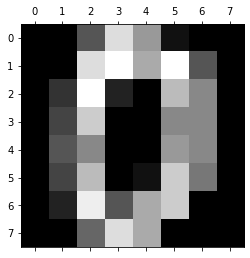

[[0]
 [1]
 [2]
 ...
 [8]
 [9]
 [8]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:

#importa a base de dígitos em tupla

digits1 = load_digits(return_X_y=True)
# em digits1[0] : vetores da imagem
# em digits1[1] : classes reais das imagens (dígitos)
print(digits1[0], digits1[1])
X=np.array(list(digits1[0]))
Y=np.array(list(digits1[1]))

plt.gray() 
plt.matshow(X[0].reshape((8,8))) 
plt.show() 

enc = OneHotEncoder()
YC=Y.copy()
YR=YC.reshape((-1,1))
print(YR)
enc.fit(YR)
YH=enc.transform(YR).toarray()
print(YH[0])



In [0]:
W = {'hidden': tf.Variable(tf.random_normal([64, 20])),
     'output': tf.Variable(tf.random_normal([20, 10]))}

#bias
b = {'hidden': tf.Variable(tf.random_normal([20])),
     'output': tf.Variable(tf.random_normal([10]))}

In [0]:
xx = tf.placeholder('float', [None, 64])
yy = tf.placeholder('float', [None, 10])

def rede(xx,W,b):
  hidden = tf.nn.relu(tf.add(tf.matmul(xx, W['hidden']), b['hidden']))
  return tf.add(tf.matmul(hidden, W['output']), b['output'])

model=rede(xx,W,b)
    

In [0]:
X_train, X_test, y_train, t_test = train_test_split(X, YH, test_size=0.3, random_state=42)

In [0]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = model, labels = y_train))
opt = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [290.80542, 287.92007, 285.05728, 282.21872, 279.40308, 276.60934, 273.83652, 271.08527, 268.35886, 265.65717, 262.97815, 260.31873, 257.6825, 255.07455, 252.49649, 249.945, 247.42572, 244.94196, 242.48752, 240.05408, 237.64029, 235.24194, 232.85826, 230.4895, 228.13797, 225.80736, 223.49545, 221.2043, 218.93666, 216.69725, 214.4784, 212.27745, 210.09909, 207.94234, 205.80345, 203.67992, 201.5748, 199.48653, 197.41656, 195.36827, 193.33716, 191.32314, 189.32843, 187.35129, 185.38817, 183.43845, 181.5054, 179.59825, 177.71169, 175.83922, 173.98187, 172.13985, 170.31676, 168.51556, 166.73709, 164.9769, 163.24, 161.52249, 159.82246, 158.13972, 156.47185, 154.82231, 153.19235, 151.58185, 149.9922, 148.42093, 146.87001, 145.33768, 143.82254, 142.32669, 140.84996, 139.39008, 137.94972, 136.52739, 135.1181, 133.7216, 132.34097, 130.97293, 129.61555, 128.27263, 126.94533, 125.63478, 124.34118, 123.06229, 121.79849, 120.55073, 119.319214, 118.09875, 116.88924, 

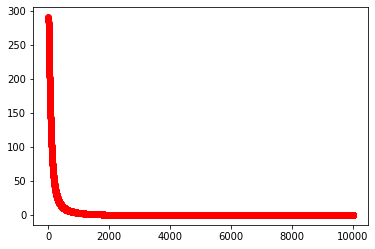

In [34]:
le = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoca in range(10000):
        sess.run(opt,feed_dict = {xx: X_train, yy: y_train})
        le.append(sess.run(loss,feed_dict={xx: X_train,yy: y_train}).mean())
    W_final, b_final = sess.run([W, b])
    ye_tr = sess.run(tf.nn.softmax(model), feed_dict={xx: X_train})
    ye_tst = sess.run(tf.nn.softmax(model), feed_dict={xx: X_test})
    #print(W_final,b_final)
    y0=sess.run(tf.nn.softmax(model),feed_dict = {xx: [X[0]]})
print(y0, le, ye_tr, ye_tst)
plt.plot(le, 'ro')
plt.show()

In [47]:
print(ye_tr, ye_tst)
yet = np.array([np.argmax(i) for i in ye_tr])
yets = np.array([np.argmax(i) for i in ye_tst])

yet, yets

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 8.4308157e-22]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 5.3649270e-29 ... 0.0000000e+00
  1.0486499e-17 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 7.4065466e-32 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 2.2575522e-31
  3.5255858e-25 0.0000000e+00]] [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+

(array([8, 7, 1, ..., 2, 7, 1]),
 array([6, 9, 3, 7, 3, 2, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
        9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
        6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
        7, 9, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 9, 2, 3, 8, 0, 6, 4,
        4, 9, 1, 2, 8, 3, 5, 2, 9, 7, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
        7, 7, 4, 4, 1, 9, 8, 7, 8, 9, 2, 6, 9, 4, 8, 7, 3, 7, 5, 8, 7, 5,
        7, 9, 0, 6, 6, 4, 2, 8, 2, 9, 4, 6, 9, 9, 6, 9, 0, 1, 8, 6, 6, 0,
        6, 4, 2, 9, 3, 9, 7, 2, 9, 0, 6, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
        7, 3, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 7, 4, 2, 3, 6,
        4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
        2, 7, 4, 6, 4, 7, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
        5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
        7, 0, 1, 0, 4, 5, 8, 5, 3, 6, 0, 1, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
     